In [57]:
library(readr)

In [58]:
df_ocupados <- read_csv2("Microdata/Ocupados.CSV")
df_general <- read_csv2("Microdata/General.CSV")

ℹ Using "','" as decimal and "'.'" as grouping mark. Use `read_delim()` for more control.

Warning message:
“One or more parsing issues, see `problems()` for details”
Rows: 32522 Columns: 200
── Column specification ────────────────────────────────────────────────────────
Delimiter: ";"
chr   (9): MES, AREA, DPTO, P6810S1, P6830S1, P6880S1, P1880S1, RAMA2D_R4, R...
dbl (183): PERIODO, PER, DIRECTORIO, SECUENCIA_P, ORDEN, HOGAR, REGIS, CLASE...
lgl   (7): P6430S1, P6585S4A1, P6585S4A2, P6765S1, P6780S1, P6915S1, P7028S1

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
ℹ Using "','" as decimal and "'.'" as grouping mark. Use `read_delim()` for more control.

Rows: 77999 Columns: 74
── Column specification ────────────────────────────────────────────────────────
Delimiter: ";"
chr  (5): MES, AREA, DPTO, P6080S1, P3147S10A1
dbl (67): PERIODO, PER, DIRECTORIO, SECUENCIA_P, ORDEN, HOGAR,

In [59]:
# colnames(df_ocupados)
colnames(df_general)

[1] "PERIODO"        "MES"            "PER"            "DIRECTORIO"    
 [5] "SECUENCIA_P"    "ORDEN"          "HOGAR"          "REGIS"         
 [9] "AREA"           "CLASE"          "FEX_C18"        "DPTO"          
[13] "PT"             "P6016"          "P3271"          "P6040"         
[17] "P6030S1"        "P6030S3"        "P6050"          "P6083"         
[21] "P6083S1"        "P6081"          "P6081S1"        "P2057"         
[25] "P2059"          "P2061"          "P6080"          "P6080S1"       
[29] "P6080S1A1"      "P6070"          "P6071"          "P6071S1"       
[33] "P3147S1"        "P3147S2"        "P3147S3"        "P3147S4"       
[37] "P3147S5"        "P3147S6"        "P3147S7"        "P3147S8"       
[41] "P3147S9"        "P3147S10"       "P3147S11"       "P3147S10A1"    
[45] "P6090"          "P6100"          "P6110"          "P6120"         
[49] "P1906S1"        "P1906S2"        "P1906S3"        "P1906S4"       
[53] "P1906S5"        "P1906S6"        "P1906S7"        "P1906S8"       
[57] "P6160"          "P6170"          "P3041"          "P3042"         
[61] "P3042S1"        "P3042S2"        "P3043"          "P3043S1"       
[65] "P3038"          "P3039"          "POB_MAY18"      "LGB_Numerica"  
[69] "LGB_sectores"   "LGBT_Numerica"  "Trans_numerica" "Discapacidad"  
[73] "Dificultad"     "Campesina"

In [60]:
df_ocupados <- df_ocupados[c('DIRECTORIO','SECUENCIA_P','ORDEN','INGLABO')]
df_general <- df_general[c('DIRECTORIO','SECUENCIA_P','ORDEN','P3271','P3042')]

In [61]:
df <- merge(df_ocupados, df_general, by=c('DIRECTORIO','SECUENCIA_P','ORDEN'))

In [62]:
df[c('DIRECTORIO','SECUENCIA_P','ORDEN')] <- NULL

In [63]:
colnames(df)[colnames(df) == 'P3271'] <- "SEXO"
colnames(df)[colnames(df) == 'P3042'] <- "EDUCACION"
colnames(df)[colnames(df) == 'INGLABO'] <- "INGRESOS"

In [64]:
df$SEXO <- ifelse(df$SEXO == 1, "HOMBRE", "MUJER")

In [65]:
colSums(is.na(df))

INGRESOS      SEXO EDUCACION 
     1089         0         0

In [66]:
df <- df[!is.na(df$INGRESOS),]

In [67]:
colSums(is.na(df))

INGRESOS      SEXO EDUCACION 
        0         0         0

In [68]:
sum(df$INGRESOS == 0)


[1] 409

In [69]:
sum(df[df$SEXO=="HOMBRE",]$INGRESOS == 0)
sum(df[df$SEXO=="MUJER",]$INGRESOS == 0)

[1] 269

[1] 140

In [70]:
df <- df[!df$INGRESOS == 0,]

In [71]:
sum(df$INGRESOS == 0)

[1] 0

In [72]:
df_h <- df[df$SEXO == "HOMBRE",]
df_m <- df[df$SEXO == "MUJER",]

In [73]:
descriptive <- rbind(summary(df_h$INGRESOS), summary(df_h$EDUCACION), summary(df_m$INGRESOS), summary(df_m$EDUCACION))
unlist(lapply(descriptive, is.numeric))

descriptive <- cbind(descriptive, c(lapply(df_h[,unlist(lapply(df_h, is.numeric))],var), lapply(df_m[,unlist(lapply(df_m, is.numeric))],var)), c(lapply(df_h[,unlist(lapply(df_h, is.numeric))],sd), lapply(df_m[,unlist(lapply(df_m, is.numeric))],sd)))
colnames(descriptive) <- c("Min.","1st Qu.", "Median","Mean","3rd Qu.","Max.","Var","SD")
rownames(descriptive) <- c("INGRESO_Hombres","EDUCACION_Hombres","INGRESO_Mujeres","EDUCACION_Mujeres")

[1] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
[16] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE

In [74]:
descriptive

Min. 1st Qu. Median Mean     3rd Qu. Max.  Var         
INGRESO_Hombres   100  680000  1e+06  1438099  1500000 1e+08 6.262205e+12
EDUCACION_Hombres 1    4       5      5.631385 8       13    7.315268    
INGRESO_Mujeres   3000 450000  1e+06  1278845  1387250 9e+07 3.512849e+12
EDUCACION_Mujeres 1    5       5      6.558432 10      13    7.953301    
                  SD      
INGRESO_Hombres   2502440 
EDUCACION_Hombres 2.704675
INGRESO_Mujeres   1874260 
EDUCACION_Mujeres 2.82016

In [75]:
library(xtable)

In [76]:
print(xtable(descriptive))

% latex table generated in R 4.2.1 by xtable 1.8-4 package
% Thu Sep  8 16:36:05 2022
\begin{table}[ht]
\centering
\begin{tabular}{rrrrrrrrr}
  \hline
 & Min. & 1st Qu. & Median & Mean & 3rd Qu. & Max. & Var & SD \\ 
  \hline
INGRESO\_Hombres & 100.00 & 680000.00 & 1000000.00 & 1438099.15 & 1500000.00 & 100000000.00 & 6262205036218.50 & 2502439.82 \\ 
  EDUCACION\_Hombres & 1.00 & 4.00 & 5.00 & 5.63 & 8.00 & 13.00 & 7.32 & 2.70 \\ 
  INGRESO\_Mujeres & 3000.00 & 450000.00 & 1000000.00 & 1278844.88 & 1387250.00 & 90000000.00 & 3512848756250.00 & 1874259.52 \\ 
  EDUCACION\_Mujeres & 1.00 & 5.00 & 5.00 & 6.56 & 10.00 & 13.00 & 7.95 & 2.82 \\ 
   \hline
\end{tabular}
\end{table}


In [77]:
print(xtable(prop.table(table(df$SEXO))))

% latex table generated in R 4.2.1 by xtable 1.8-4 package
% Thu Sep  8 16:36:05 2022
\begin{table}[ht]
\centering
\begin{tabular}{rr}
  \hline
 & V1 \\ 
  \hline
HOMBRE & 0.57 \\ 
  MUJER & 0.43 \\ 
   \hline
\end{tabular}
\end{table}


In [78]:
t.test(df_m$INGRESOS, df_h$INGRESOS, var.equal = FALSE, alternative = "two.sided", conf.level = 0.95)


	Welch Two Sample t-test

data:  df_m$INGRESOS and df_h$INGRESOS
t = -6.409, df = 31019, p-value = 1.486e-10
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -207958.7 -110549.8
sample estimates:
mean of x mean of y 
  1278845   1438099 


In [79]:
t.test(df_m$INGRESOS, df_h$INGRESOS, var.equal = FALSE, alternative = "less", conf.level = 0.95)


	Welch Two Sample t-test

data:  df_m$INGRESOS and df_h$INGRESOS
t = -6.409, df = 31019, p-value = 7.431e-11
alternative hypothesis: true difference in means is less than 0
95 percent confidence interval:
      -Inf -118380.6
sample estimates:
mean of x mean of y 
  1278845   1438099 


In [80]:
library(dplyr)

In [81]:
df = mutate(df, decil_ING = ntile(df$INGRESOS,10))

In [82]:
tab_sex_decil <- table(df$decil_ING, df$SEXO)
tab_sex_decil

    
     HOMBRE MUJER
  1    1151  1952
  2    1565  1538
  3    1756  1347
  4    2083  1020
  5    1920  1182
  6    1842  1260
  7    1845  1257
  8    1921  1181
  9    1826  1276
  10   1749  1353

In [83]:
chisq <- chisq.test(tab_sex_decil)

In [84]:
print(xtable(round(chisq$stdres,2)))

% latex table generated in R 4.2.1 by xtable 1.8-4 package
% Thu Sep  8 16:36:06 2022
\begin{table}[ht]
\centering
\begin{tabular}{rrr}
  \hline
 & HOMBRE & MUJER \\ 
  \hline
1 & -23.51 & 23.51 \\ 
  2 & -7.69 & 7.69 \\ 
  3 & -0.39 & 0.39 \\ 
  4 & 12.11 & -12.11 \\ 
  5 & 5.90 & -5.90 \\ 
  6 & 2.92 & -2.92 \\ 
  7 & 3.04 & -3.04 \\ 
  8 & 5.94 & -5.94 \\ 
  9 & 2.31 & -2.31 \\ 
  10 & -0.63 & 0.63 \\ 
   \hline
\end{tabular}
\end{table}


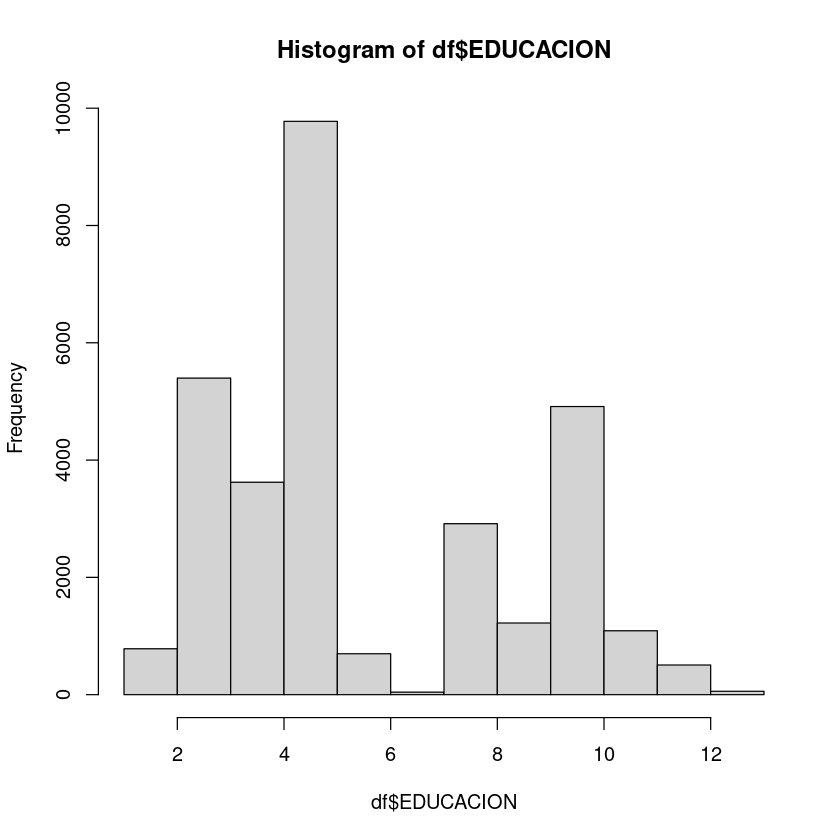

In [85]:
hist(df$EDUCACION)

In [86]:
tab_gnl_educ_decil <- table(df$EDUCACION, df$decil_ING)
tab_hmb_educ_decil <- table(df[df$SEXO == "HOMBRE",]$EDUCACION, df[df$SEXO == "HOMBRE",]$decil_ING)
tab_mjr_educ_decil <- table(df[df$SEXO == "MUJER",]$EDUCACION, df[df$SEXO == "MUJER",]$decil_ING)

In [87]:
chisq_gnl <- chisq.test(tab_gnl_educ_decil)
chisq_hmb <- chisq.test(tab_hmb_educ_decil)
chisq_mjr <- chisq.test(tab_mjr_educ_decil)

Warning message in chisq.test(tab_gnl_educ_decil):
“Chi-squared approximation may be incorrect”
Warning message in chisq.test(tab_hmb_educ_decil):
“Chi-squared approximation may be incorrect”
Warning message in chisq.test(tab_mjr_educ_decil):
“Chi-squared approximation may be incorrect”


In [88]:
chisq_gnl$observed
chisq_hmb$observed
chisq_mjr$observed

    
        1    2    3    4    5    6    7    8    9   10
  1   228  191  145   78   49   26   37   23    2    3
  2     1    0    0    0    0    0    0    0    0    0
  3  1030  904  791  764  500  438  391  337  176   67
  4   491  527  554  599  384  310  348  239  118   52
  5   945  996 1040 1136 1331 1318 1201 1003  579  227
  6    43   55   61   44   84   94  126  108   55   28
  7     5    6    3    0    1    3    7    4    9    5
  8   166  180  215  215  350  408  457  445  358  121
  9    48   57   65   52  111  160  149  219  230  131
  10  138  181  219  203  273  330  368  660 1252 1289
  11    6    6    8   10   16   12   11   51  234  736
  12    2    0    2    2    2    3    7   13   88  387
  13    0    0    0    0    1    0    0    0    1   56

    
       1   2   3   4   5   6   7   8   9  10
  1  124 142 107  64  42  22  31  18   2   3
  2    1   0   0   0   0   0   0   0   0   0
  3  433 542 540 570 394 352 291 276 148  55
  4  197 278 353 445 271 228 262 186 103  38
  5  285 429 540 757 846 831 773 727 463 179
  6   11  27  27  26  55  56  72  73  50  21
  7    0   1   1   0   0   1   0   2   2   1
  8   31  50  62  93 136 151 180 195 202  88
  9   17  19  29  31  52  70  72 109 134 101
  10  48  75  94  90 118 123 155 308 599 684
  11   2   2   3   6   4   6   5  19  81 351
  12   2   0   0   1   1   2   4   8  41 196
  13   0   0   0   0   1   0   0   0   1  32

    
       1   2   3   4   5   6   7   8   9  10
  1  104  49  38  14   7   4   6   5   0   0
  3  597 362 251 194 106  86 100  61  28  12
  4  294 249 201 154 113  82  86  53  15  14
  5  660 567 500 379 485 487 428 276 116  48
  6   32  28  34  18  29  38  54  35   5   7
  7    5   5   2   0   1   2   7   2   7   4
  8  135 130 153 122 214 257 277 250 156  33
  9   31  38  36  21  59  90  77 110  96  30
  10  90 106 125 113 155 207 213 352 653 605
  11   4   4   5   4  12   6   6  32 153 385
  12   0   0   2   1   1   1   3   5  47 191
  13   0   0   0   0   0   0   0   0   0  24

In [89]:
round(chisq_gnl$expected,2)
round(chisq_hmb$expected,2)
round(chisq_mjr$expected,2)

,1,2,3,4,5,6,7,8,9,10
1,78.22,78.22,78.22,78.22,78.19,78.19,78.19,78.19,78.19,78.19
2,0.10,0.10,0.10,0.10,0.10,0.10,0.10,0.10,0.10,0.10
3,539.90,539.90,539.90,539.90,539.73,539.73,539.73,539.73,539.73,539.73
4,362.27,362.27,362.27,362.27,362.15,362.15,362.15,362.15,362.15,362.15
5,977.79,977.79,977.79,977.79,977.47,977.47,977.47,977.47,977.47,977.47
6,69.81,69.81,69.81,69.81,69.79,69.79,69.79,69.79,69.79,69.79
7,4.30,4.30,4.30,4.30,4.30,4.30,4.30,4.30,4.30,4.30
8,291.56,291.56,291.56,291.56,291.46,291.46,291.46,291.46,291.46,291.46
9,122.22,122.22,122.22,122.22,122.18,122.18,122.18,122.18,122.18,122.18
10,491.40,491.40,491.40,491.40,491.24,491.24,491.24,491.24,491.24,491.24


,1,2,3,4,5,6,7,8,9,10
1,36.18,49.19,55.19,65.47,60.35,57.90,57.99,60.38,57.39,54.97
2,0.07,0.09,0.10,0.12,0.11,0.10,0.10,0.11,0.10,0.10
3,234.72,319.15,358.10,424.79,391.55,375.64,376.25,391.75,372.38,356.67
4,153.90,209.25,234.79,278.51,256.72,246.29,246.69,256.85,244.15,233.85
5,380.02,516.70,579.76,687.73,633.91,608.16,609.15,634.24,602.88,577.45
6,27.25,37.05,41.57,49.31,45.45,43.60,43.67,45.47,43.23,41.40
7,0.52,0.71,0.80,0.94,0.87,0.83,0.84,0.87,0.83,0.79
8,77.44,105.29,118.14,140.14,129.17,123.93,124.13,129.24,122.85,117.67
9,41.33,56.19,63.05,74.79,68.94,66.14,66.24,68.97,65.56,62.80
10,149.53,203.31,228.13,270.61,249.43,239.30,239.69,249.56,237.22,227.22


,1,2,3,4,5,6,7,8,9,10
1,33.15,26.12,22.88,17.32,20.07,21.40,21.35,20.06,21.67,22.98
3,262.44,206.78,181.10,137.13,158.91,169.40,169.00,158.78,171.55,181.90
4,184.16,145.10,127.08,96.23,111.51,118.87,118.59,111.42,120.38,127.65
5,576.28,454.06,397.67,301.13,348.96,371.99,371.10,348.66,376.71,399.44
6,40.89,32.22,28.22,21.37,24.76,26.40,26.33,24.74,26.73,28.34
7,5.11,4.03,3.53,2.67,3.10,3.30,3.29,3.09,3.34,3.54
8,252.21,198.72,174.04,131.79,152.72,162.80,162.42,152.60,164.87,174.82
9,85.87,67.66,59.26,44.87,52.00,55.43,55.30,51.95,56.13,59.52
10,382.48,301.36,263.94,199.86,231.61,246.89,246.30,231.41,250.03,265.11
11,89.23,70.31,61.58,46.63,54.03,57.60,57.46,53.99,58.33,61.85


In [90]:
round(chisq_gnl$stdres,2)
round(chisq_hmb$stdres,2)
round(chisq_mjr$stdres,2)

    
          1      2      3      4      5      6      7      8      9     10
  1   18.08  13.62   8.06  -0.03  -3.52  -6.30  -4.97  -6.66  -9.20  -9.08
  2    3.00  -0.33  -0.33  -0.33  -0.33  -0.33  -0.33  -0.33  -0.33  -0.33
  3   24.46  18.17  12.53  11.19  -1.98  -5.08  -7.42 -10.12 -18.16 -23.60
  4    7.59   9.71  11.30  13.95   1.29  -3.07  -0.83  -7.26 -14.39 -18.28
  5   -1.34   0.74   2.53   6.44  14.40  13.87   9.11   1.04 -16.23 -30.57
  6   -3.42  -1.89  -1.12  -3.29   1.81   3.09   7.17   4.88  -1.89  -5.33
  7    0.36   0.86  -0.66  -2.19  -1.68  -0.66   1.37  -0.15   2.39   0.36
  8   -8.14  -7.24  -4.97  -4.97   3.80   7.56  10.74   9.96   4.32 -11.06
  9   -7.22  -6.35  -5.57  -6.83  -1.09   3.68   2.61   9.42  10.49   0.86
  10 -18.32 -16.09 -14.12 -14.95 -11.31  -8.36  -6.39   8.75  39.44  41.36
  11 -10.59 -10.59 -10.38 -10.18  -9.56  -9.97 -10.07  -5.96  12.85  64.45
  12  -7.26  -7.56  -7.26  -7.26  -7.26  -7.11  -6.51  -5.62   5.59  50.26
  13  -2.54  -2.54  

    
          1      2      3      4      5      6      7      8      9     10
  1   15.35  14.08   7.47  -0.20  -2.54  -5.06  -3.81  -5.87  -7.85  -7.50
  2    3.79  -0.31  -0.33  -0.37  -0.35  -0.34  -0.34  -0.35  -0.34  -0.33
  3   15.00  14.65  11.35   8.41   0.15  -1.44  -5.21  -6.94 -13.76 -18.86
  4    3.86   5.35   8.73  11.41   1.01  -1.32   1.11  -5.03 -10.25 -14.50
  5   -6.16  -4.94  -2.13   3.44  10.90  11.67   8.57   4.77  -7.35 -21.34
  6   -3.26  -1.75  -2.41  -3.58   1.52   2.01   4.58   4.38   1.10  -3.38
  7   -0.75   0.36   0.24  -1.03  -0.99   0.19  -0.97   1.28   1.36   0.25
  8   -5.65  -5.84  -5.64  -4.39   0.66   2.66   5.49   6.34   7.81  -2.98
  9   -3.99  -5.29  -4.60  -5.49  -2.20   0.51   0.76   5.20   9.09   5.17
  10  -9.21 -10.11 -10.03 -12.53  -9.45  -8.52  -6.20   4.20  26.59  34.23
  11  -5.48  -6.59  -6.91  -7.25  -7.16  -6.66  -6.82  -4.93   4.79  47.07
  12  -3.74  -5.02  -5.35  -5.69  -5.42  -5.08  -4.67  -4.00   3.03  36.05
  13  -1.54  -1.82  

    
          1      2      3      4      5      6      7      8      9     10
  1   13.43   4.80   3.36  -0.84  -3.08  -3.99  -3.52  -3.55  -4.94  -5.10
  3   24.02  12.33   5.89   5.43  -4.73  -7.24  -5.99  -8.74 -12.39 -14.28
  4    9.20   9.63   7.27   6.44   0.15  -3.73  -3.30  -6.09 -10.61 -11.15
  5    4.50   6.71   6.45   5.56   9.09   7.46   3.70  -4.85 -16.82 -22.09
  6   -1.52  -0.80   1.16  -0.77   0.90   2.40   5.72   2.18  -4.47  -4.27
  7   -0.05   0.52  -0.86  -1.70  -1.25  -0.75   2.15  -0.65   2.11   0.26
  8   -8.56  -5.55  -1.80  -0.95   5.57   8.31  10.12   8.85  -0.78 -12.12
  9   -6.55  -3.92  -3.26  -3.79   1.04   4.99   3.14   8.63   5.72  -4.13
  10 -18.05 -13.34 -10.06  -7.13  -5.88  -2.97  -2.49   9.26  29.88  24.56
  11 -10.00  -8.61  -7.78  -6.65  -6.13  -7.31  -7.30  -3.21  13.34  44.37
  12  -6.61  -5.77  -4.93  -4.36  -4.76  -4.94  -4.50  -3.86   5.00  34.98
  13  -2.03  -1.77  -1.64  -1.41  -1.53  -1.58  -1.58  -1.53  -1.59  14.61